# Unupervised Learning

## Course Project - FM [Date: July 2021]

### Required Tasks:
1.	Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.
2.	Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
3.	Brief summary of data exploration and actions taken for data cleaning or feature engineering.
4.	Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.
5.	A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.
6.	Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.
7.	Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.


### 1. Main Objectives

This project is focused on the "clustering" of teams based on their season's performance and statistics (e.g. win to game ratio, etc.). Then we'll compare these clusters with the post-season rank of the teams to see if there is any correlation.

### 2. DATASET

For this project,  2015-2019 College Basketball Dataset is chosen. (The dataset can be downloaded from: https://www.kaggle.com/andrewsundberg/college-basketball-dataset)


**VARIABLES**
The dataset includes the following columns (i.e. variables):


 -	TEAM: The Division I college basketball school
 -	CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)
 -	G: Number of games played
 -	W: Number of games won
 -	ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
 -	ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)
 -	BARTHAG: Power Rating (Chance of beating an average Division I team)
 -	EFG_O: Effective Field Goal Percentage Shot
 -	EFG_D: Effective Field Goal Percentage Allowed
 -	TOR: Turnover Percentage Allowed (Turnover Rate)
 -	TORD: Turnover Percentage Committed (Steal Rate)
 -	ORB: Offensive Rebound Rate
 -	DRB: Offensive Rebound Rate Allowed
 -	FTR : Free Throw Rate (How often the given team shoots Free Throws)
 -	FTRD: Free Throw Rate Allowed
 -	2P_O: Two-Point Shooting Percentage
 -	2P_D: Two-Point Shooting Percentage Allowed
 -	3P_O: Three-Point Shooting Percentage
 -	3P_D: Three-Point Shooting Percentage Allowed
 -	ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)
 -	WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)
 -	POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)
 -	SEED: Seed in the NCAA March Madness Tournament
 -	YEAR: Season


## 3.1. Brief summary of data exploration:
The goal in this section is to better understand the amount and type of information available in the dataset. For this purpose, after importing the needed packages such as numpy, pandas, matplotlib, and seaborn, we will load the dataset and look at its attributes.


In [46]:
# importing needed packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
# reading dataset
cbb = pd.read_csv("cbb_15-19.csv")
cbb.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0


In [48]:
# Dataset info
cbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1757 non-null   object 
 1   CONF        1757 non-null   object 
 2   G           1757 non-null   int64  
 3   W           1757 non-null   int64  
 4   ADJOE       1757 non-null   float64
 5   ADJDE       1757 non-null   float64
 6   BARTHAG     1757 non-null   float64
 7   EFG_O       1757 non-null   float64
 8   EFG_D       1757 non-null   float64
 9   TOR         1757 non-null   float64
 10  TORD        1757 non-null   float64
 11  ORB         1757 non-null   float64
 12  DRB         1757 non-null   float64
 13  FTR         1757 non-null   float64
 14  FTRD        1757 non-null   float64
 15  2P_O        1757 non-null   float64
 16  2P_D        1757 non-null   float64
 17  3P_O        1757 non-null   float64
 18  3P_D        1757 non-null   float64
 19  ADJ_T       1757 non-null  

In [49]:
# Column names
print(cbb.columns.tolist())

['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED']


In [50]:
# Data types
print(cbb.dtypes)

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
dtype: object


In [51]:
# Dataste statistics
cbb.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,340.000000
mean,31.523051,16.513375,103.542402,103.542459,0.493398,50.120489,50.312806,18.591804,18.521286,29.277120,29.467445,35.097894,35.373307,49.135970,49.298065,34.563517,34.744792,68.422254,-7.837109,8.791176
std,2.602819,6.545571,7.304975,6.472676,0.255291,3.130430,2.859604,1.991637,2.108968,4.101782,3.061786,4.884599,5.900935,3.422136,3.288265,2.742323,2.369727,3.258920,6.988694,4.674090
min,24.000000,0.000000,76.700000,84.000000,0.007700,39.400000,39.600000,12.400000,10.200000,15.000000,18.400000,21.600000,21.800000,37.700000,37.700000,25.200000,27.100000,57.200000,-25.200000,1.000000
25%,30.000000,12.000000,98.600000,98.900000,0.283700,48.100000,48.400000,17.200000,17.100000,26.600000,27.300000,31.700000,31.200000,46.900000,47.100000,32.600000,33.100000,66.400000,-13.000000,5.000000
50%,31.000000,16.000000,103.100000,103.800000,0.474000,50.000000,50.300000,18.500000,18.500000,29.400000,29.400000,34.900000,34.900000,49.000000,49.300000,34.600000,34.700000,68.500000,-8.400000,9.000000
75%,33.000000,21.000000,108.100000,108.000000,0.710600,52.100000,52.300000,19.800000,19.900000,31.900000,31.500000,38.300000,39.200000,51.400000,51.500000,36.400000,36.300000,70.400000,-3.100000,13.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,26.100000,28.000000,42.100000,40.400000,51.000000,58.500000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000


### 3.2. Actions taken for data cleaning and feature engineering:
In this section we will look at the null values and outliers in the dataset. We also try to discover the potential correaltions between different columns and apply approapriate transformation to make the data ready for further analysis.


In [52]:
# removing rows with null values as the Postseason rank
cbb.isnull().sum().sort_values(ascending = False)
cbb.dropna(inplace=True)

Null Values:

- SEED: 1417 null values
- POSTSEASON: 1417 null values


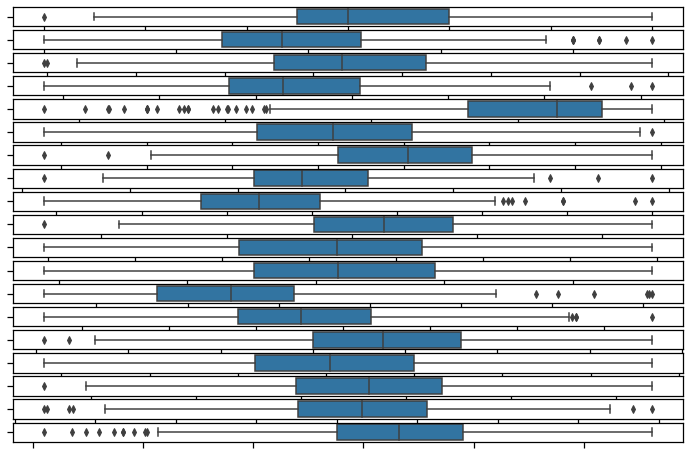

In [53]:
#cheking for outliers in a data using boxplots
columns_to_analyze = cbb.columns[2:-2] #choose numeric columns
plt.figure(figsize= (12,8))
for i, col in enumerate(columns_to_analyze):
    plt.subplot(19,1,i+1)
    snsbp = sns.boxplot(x=cbb[col])
    snsbp.set(xticklabels=[])
    snsbp.set(xlabel=None)



As the above figure shows, there seem to be some outliers in most of the columns. As such, we try to identify and replace outliers in the data.


In [54]:
# replacing outliers in each column with the mean value

for col in columns_to_analyze:
    q25,q50,q75 = np.percentile(cbb[col], [25,50,75])
    iqr = q75 - q25  # inter-quartile range
    min = q25 - 1.5*iqr
    max = q75 + 1.5*iqr
    outlier_idx = cbb[(cbb[col]>max) | (cbb[col]<min)].index #get outlier index
    cbb.loc[outlier_idx,col] = np.nanmean(cbb[col])

It's observed that the range of values varies for diffferent columns. Here, we define a new dataframe (i.e. cbb_norm) by calculating the ratio between the values in mutually related columns.



In [65]:
cbb_norm = pd.DataFrame()
cbb_norm["TEAM"] = cbb["TEAM"]
cbb_norm["W_G_Ratio"] = cbb["W"]/cbb["G"]
cbb_norm["ADJOE_ADJDE_Ratio"] = cbb["ADJOE"]/cbb["ADJDE"]
cbb_norm["EFGO_EFGD_Ratio"] = cbb["EFG_O"]/cbb["EFG_D"]
cbb_norm["TORD_TOR_Ratio"] = cbb["TORD"]/cbb["TOR"]
cbb_norm["ORB_DRB_Ratio"] = cbb["ORB"]/cbb["DRB"]
cbb_norm["FTR_FTRD_Ratio"] = cbb["FTR"]/cbb["FTRD"]
cbb_norm["2PO_2PD_Ratio"] = cbb["2P_O"]/cbb["2P_D"]
cbb_norm["3PO_3PD_Ratio"] = cbb["3P_O"]/cbb["3P_D"]
cbb_norm["ADJT_Ratio"] = cbb["ADJ_T"]/100
cbb_norm["POSTSEASON"] = cbb["POSTSEASON"]



In [66]:
# Final standing of the teams in March Madness tournament
cbb_norm['POSTSEASON'].value_counts(ascending=True)

Champions      5
2ND            5
F4            10
R68           20
E8            20
S16           40
R32           80
R64          160
Name: POSTSEASON, dtype: int64

In [67]:
# We will divide the teams based on Post-Season ranks into two Levels:
# - L1: Teams that made it to the final 16
# - L2: Teams eliminated before
POSTSEASON_dict = {'Champions':"L1", '2ND':"L1", 'F4':"L1", 'E8':"L1", 'S16':"L1", 'R32':"L2", 'R64':"L2", 'R68':"L2"}
cbb_norm['Level'] = cbb_norm['POSTSEASON'].map(POSTSEASON_dict)
cbb_norm.drop(['POSTSEASON'],axis=1,inplace=True)
cbb_norm.reset_index(drop=True)
cbb_norm.head()


,TEAM,W_G_Ratio,ADJOE_ADJDE_Ratio,EFGO_EFGD_Ratio,TORD_TOR_Ratio,ORB_DRB_Ratio,FTR_FTRD_Ratio,2PO_2PD_Ratio,3PO_3PD_Ratio,ADJT_Ratio,Level
0,North Carolina,0.825000,1.299262,1.093555,1.181818,1.356667,1.062500,1.208520,0.903315,0.71700,L1
1,Wisconsin,0.617721,1.379274,1.148847,0.910416,1.354430,1.616071,1.225951,0.973333,0.68125,L1
2,Michigan,0.825000,1.265487,1.129979,1.392857,1.024096,1.023333,1.168803,1.060241,0.65900,L1
3,Texas Tech,0.815789,1.352113,1.244186,1.288136,0.954704,0.898907,1.260143,1.228956,0.67500,L1
4,Gonzaga,0.633560,1.365006,1.179037,1.055556,1.145038,1.449814,1.407500,1.317241,0.71500,L1


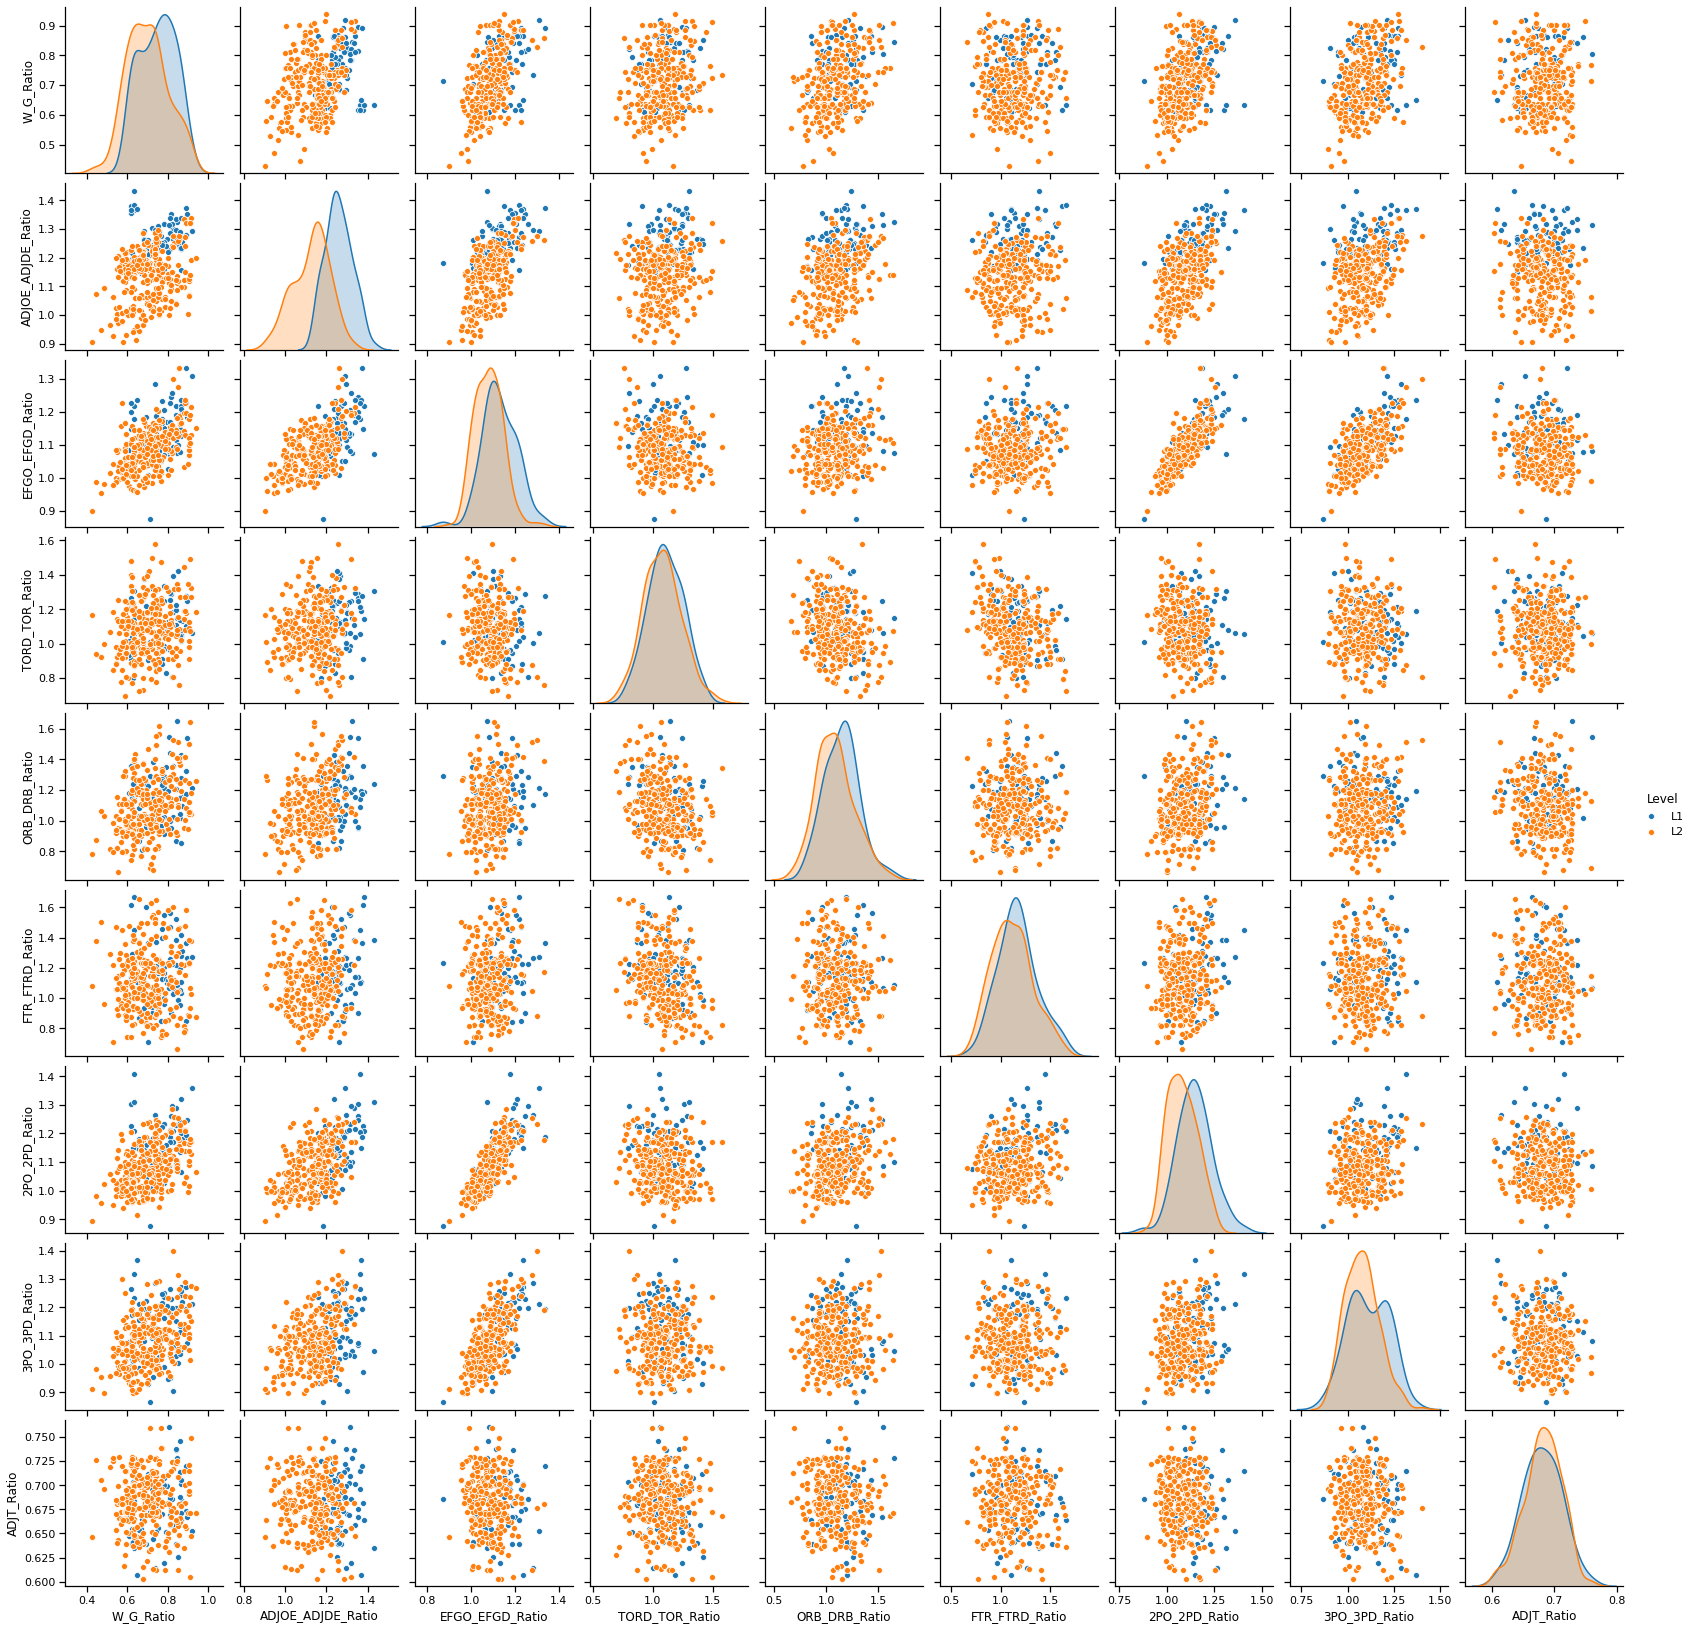

In [69]:
#To visualzie the resulting dataframe, we use seaborn's pairplot:

sns.pairplot(cbb_norm, hue='Level');


In [ ]:
sns.heatmap(cbb_norm.corr(), annot = True)

According to the above pairplot, it seems that teams Levels is more correlated with the following columns:
"W_G_Ratio", "ADJOE_ADJDE_Ratio","EFGO_EFGD_Ratio","2PO_2PD_Ratio"]

As such, to reduce the number of features and avoid the curse of dimensionality, we choose this 4 paramteres as our clustering model featurs.


### 4.	Training 3 Clustering models:



In [71]:
# features and team Levels
feature_cols = ["W_G_Ratio", "ADJOE_ADJDE_Ratio","EFGO_EFGD_Ratio","2PO_2PD_Ratio"]
data=cbb_norm.copy()[feature_cols]
data["Level"] = cbb_norm["Level"]

X = data[feature_cols]
y = data["Level"]

In [72]:
### 4.1. KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='k-means++')
km.fit(X)
data["y_km"] = km.predict(X)
(data[['Level','y_km']]
 .groupby(['Level','y_km'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))


number
Level y_km        
L1    0         65
      1         15
L2    0        109
      1        151

In [73]:
### 4.2. AgglomerativeClustering:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=2, linkage='ward')
ag = ag.fit(X)
data['y_ag'] = ag.fit_predict(X)

(data[['Level','y_ag']]
 .groupby(['Level','y_ag'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))


number
Level y_ag        
L1    0         20
      1         60
L2    0        150
      1        110

In [74]:
### 4.3. DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=5)
db = db.fit(X)
data['y_db'] = db.fit_predict(X)

(data[['Level','y_db']]
 .groupby(['Level','y_db'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

,,number
Level,y_db,
L1,0,80
L2,0,260


### 5.	Final model recommendation
Comparing the results, KMeans and AgglomerativeClustering models leading to similar results and are recommended as clusteriung methods for teams based on their season stats.


### 6.	Summary Key Findings and Insights
- This project is focused on the grouping on teams based on their season's performance and statistics (features).
- The idea is to see if there is any correlation with the grouping based on the season stats and their post season rank.
- Data needs some cleanisng/pre-processing before using the clustering models.
- 3 clustering algorithms have been tested:
    1. KMeans
    2. AgglomerativeClustering
    3. DBSCAN
- DBSCAN clusters all the points into one group.



### 7.	Suggestions for next steps in analyzing this data:

Other clustering methods such as MeanShift can be utilized. Also, model hyperparameters can be tuned for better results.